In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns
from tabulate import tabulate
%matplotlib inline

In [32]:
df = pd.read_csv('document_results.csv')

In [27]:
model_aliases = {
    'BernoulliNB(tfidf=False, ngram_n=1)': 'BNB',
    'BernoulliNB(tfidf=True, ngram_n=1)': 'BNB tfidf',
    'FCholletCNN(dropout_rate=0.5, optimizer=adam, embedding_dim=100, batch_size=32, epochs=20, max_seq_len=1000, embeddings_path=../data/glove.6B/glove.6B.100d.txt, units=400)': 'CNN glove',
    'FCholletCNN(dropout_rate=0.5, optimizer=adam, embedding_dim=37, batch_size=32, epochs=30, max_seq_len=1000, embeddings_path=None, units=400)': 'CNN 37d',
    'MLP(layers=1, units=360, dropout_rate=0.87, max_vocab_size=22000, epochs=12, batch_size=128)': 'MLP 1x360',
    'MLP(layers=2, units=180, dropout_rate=0.6, max_vocab_size=22000, epochs=5, batch_size=128)': 'MLP 2x180',
    'MLP(layers=3, units=512, dropout_rate=0.2, max_vocab_size=10000, epochs=20, batch_size=128)': 'MLP 3x512',
    'MultinomialNB(tfidf=False, ngram_n=1)': 'MNB',
    'MultinomialNB(tfidf=False, ngram_n=2)': 'MNB bi',
    'MultinomialNB(tfidf=True, ngram_n=1)': 'MNB tfidf',
    'MultinomialNB(tfidf=True, ngram_n=2)': 'MNB tfidf bi',
    'MultinomialNB(tfidf=True, ngram_n=3)': 'MNB tfidf tri',
    'SVC(tfidf=False, ngram_n=1, kernel=linear)': 'SVM',
    'SVC(tfidf=False, ngram_n=2, kernel=linear)': 'SVM bi',
    'SVC(tfidf=True, ngram_n=1, kernel=linear)': 'SVM tfidf',
    'SVC(tfidf=True, ngram_n=2, kernel=linear)': 'SVM tfidf bi'
}

df['accuracy'] = df.score
df['model_name'] = df.model.map(lambda x: model_aliases[x])
df['dataset_name'] = df.dataset.map(lambda x: x.split('/')[-1])

def filter_df(df, models=None, datasets=None):
    if models is not None:
        df = df[df.model_name.isin(models)].reset_index()
    if datasets is not None:
        df = df[df.dataset_name.isin(datasets)].reset_index()
    return df

model_set = {
    'CNN glove',
    'CNN 37d',
    'MLP 1x360',
#     'MLP 2x180',
#     'MLP 3x512',
    'MNB',
#     'MNB bi',
#     'MNB tfidf',
#     'MNB tfidf bi',
#     'MNB tfidf tri',
#     'SVM',
#     'SVM bi',
    'SVM tfidf',
    'SVM tfidf bi'
}

basic_datasets = {
    '20ng-all-terms.txt',
#     '20ng-no-short.txt',
#     '20ng-no-stop.txt',
#     '20ng-stemmed.txt',
    'r52-all-terms.txt',
#     'r52-no-short.txt',
#     'r52-no-stop.txt',
#     'r52-stemmed.txt',
    'r8-all-terms.txt',
#     'r8-no-short.txt',
#     'r8-no-stop.txt',
#     'r8-stemmed.txt',
    'webkb-stemmed.txt'
}

df1_small = filter_df(df, model_set, basic_datasets)

In [28]:
def make_pretty(dataframe):
    dataset_list = list(set(dataframe.dataset_name))
    models_ranked = list(dataframe.groupby('model_name').mean().sort_values('accuracy', ascending=False).reset_index().model_name)

    sns.set(style="whitegrid", palette="husl")
    f, ax = plt.subplots(1, figsize=(13,5))

    sns.stripplot(x='dataset_name', y='accuracy', hue='model_name', jitter=True, data=dataframe, edgecolor='white', ax=ax)
    plt.legend(loc='lower right')
    plt.show()

    sns.set(style="whitegrid", palette="husl")
    f, ax = plt.subplots(1, figsize=(13,5))

    sns.stripplot(x='dataset_name', y='time', hue='model_name', jitter=True, data=dataframe, edgecolor='white', ax=ax)
    plt.show()

    sns.set(style="whitegrid", palette="husl")
    f, ax = plt.subplots(1, figsize=(13,5))
    sns.barplot(x='dataset_name', y='accuracy', hue='model_name', data=dataframe, ax=ax, hue_order=models_ranked)
    plt.show()

    sns.set(style="whitegrid", palette="husl")
    f, ax = plt.subplots(1, figsize=(12,6))
    sns.boxplot(x='dataset_name', y='accuracy', hue='model_name', data=dataframe, ax=ax)

    sns.set(style="whitegrid", palette="husl")
    f, ax = plt.subplots(1, figsize=(12,6))
    sns.barplot(x='dataset_name', y='time', hue='model_name', data=dataframe, ax=ax, hue_order=models_ranked)
    plt.show()

    means = dataframe.groupby(['dataset_name', 'model_name']).mean().reset_index()
    model_data_2_score = {(m, d): acc for m, d, acc in zip(means.model_name, means.dataset_name, means.accuracy)}
    model_data_2_time = {(m, d): acc for m, d, acc in zip(means.model_name, means.dataset_name, means.time)}

    table = [([m] + [model_data_2_score[(m, d)] for d in dataset_list]) for m in models_ranked]
    print tabulate(table, headers=(['model'] + dataset_list), floatfmt='.3f')


    print 
    table = [([m] + [model_data_2_time[(m, d)] for d in dataset_list]) for m in models_ranked]
    print tabulate(table, headers=(['model'] + dataset_list), floatfmt='.3f')


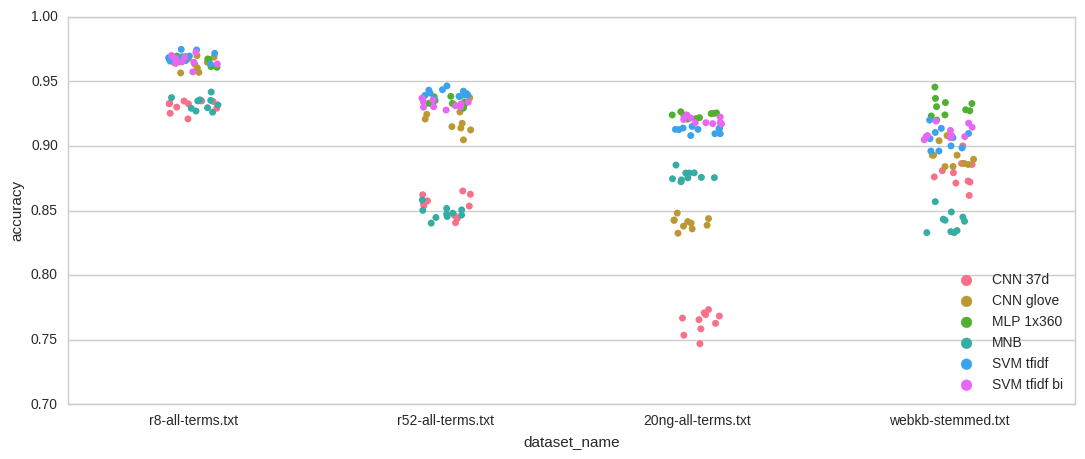

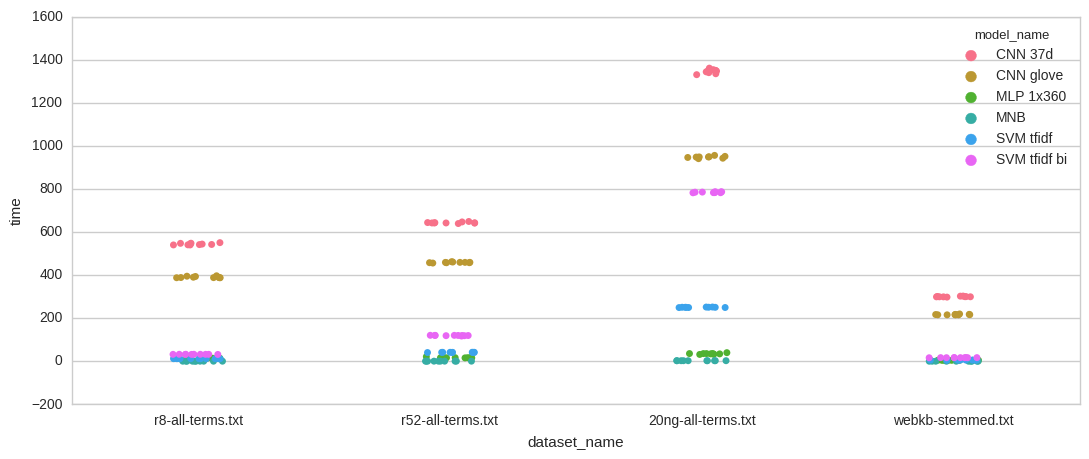

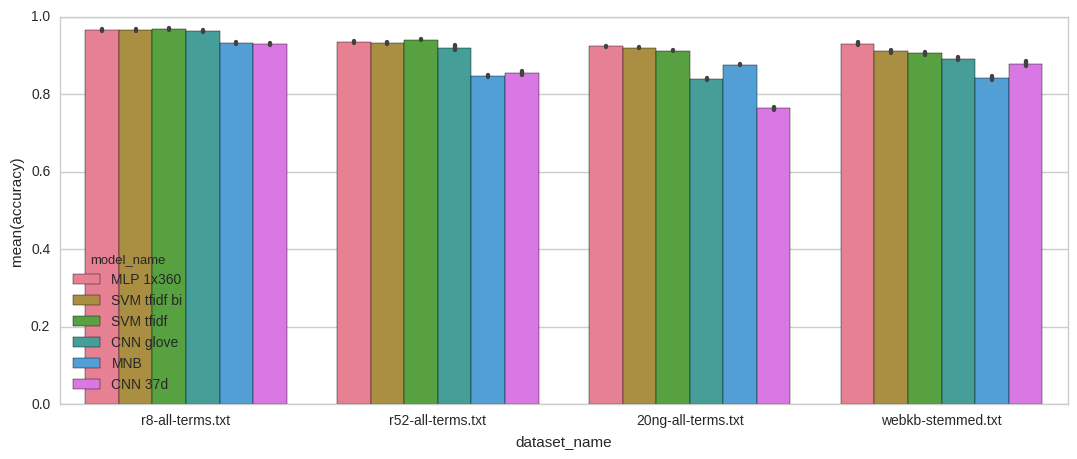

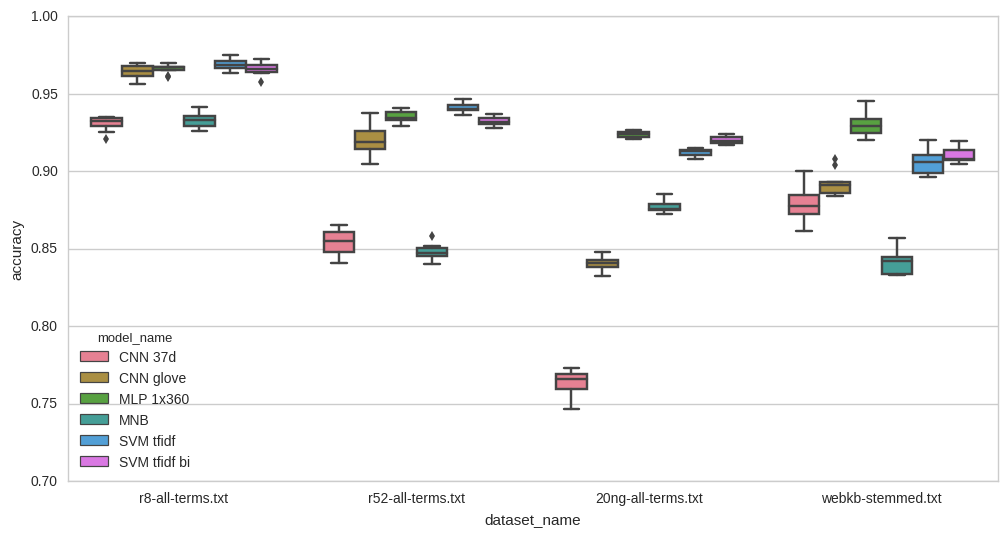

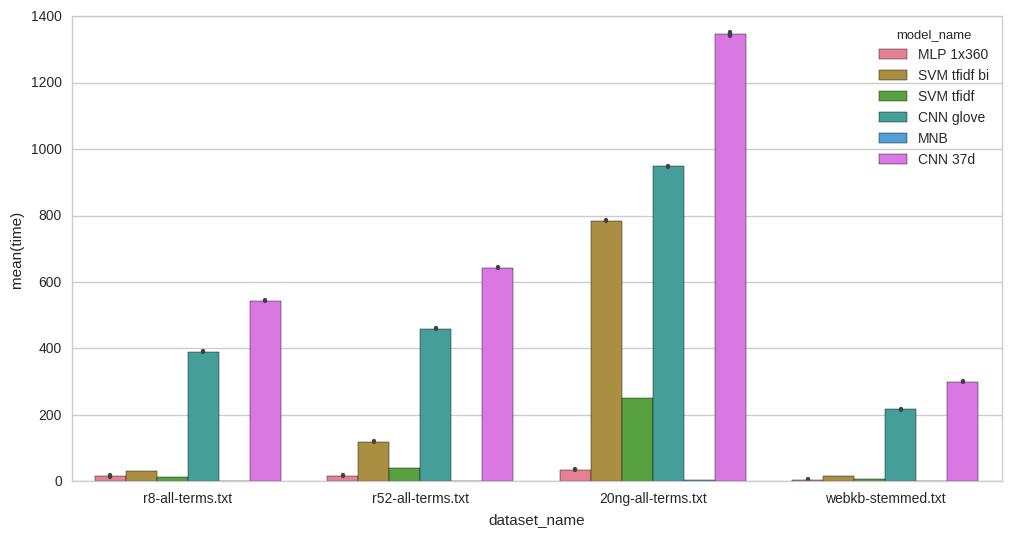

model           r8-all-terms.txt    r52-all-terms.txt    20ng-all-terms.txt    webkb-stemmed.txt
------------  ------------------  -------------------  --------------------  -------------------
MLP 1x360                  0.966                0.935                 0.924                0.930
SVM tfidf bi               0.966                0.932                 0.920                0.911
SVM tfidf                  0.969                0.941                 0.912                0.906
CNN glove                  0.964                0.920                 0.840                0.892
MNB                        0.933                0.848                 0.877                0.841
CNN 37d                    0.931                0.854                 0.764                0.879

model           r8-all-terms.txt    r52-all-terms.txt    20ng-all-terms.txt    webkb-stemmed.txt
------------  ------------------  -------------------  --------------------  -------------------
MLP 1x360                 15.

In [29]:
make_pretty(df1)

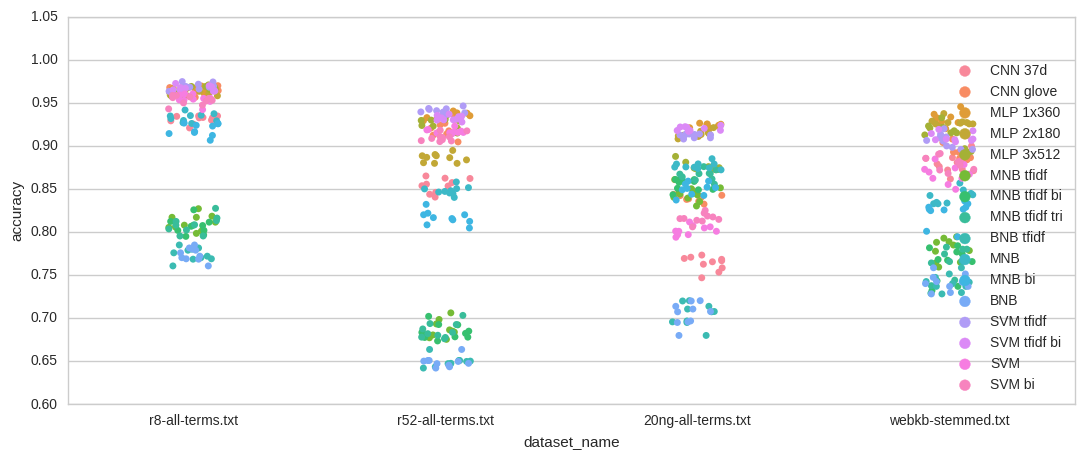

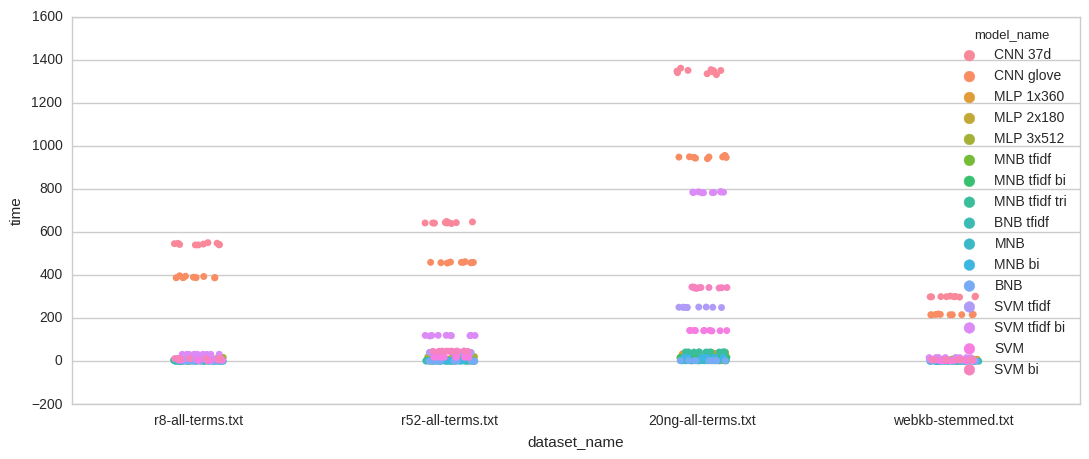

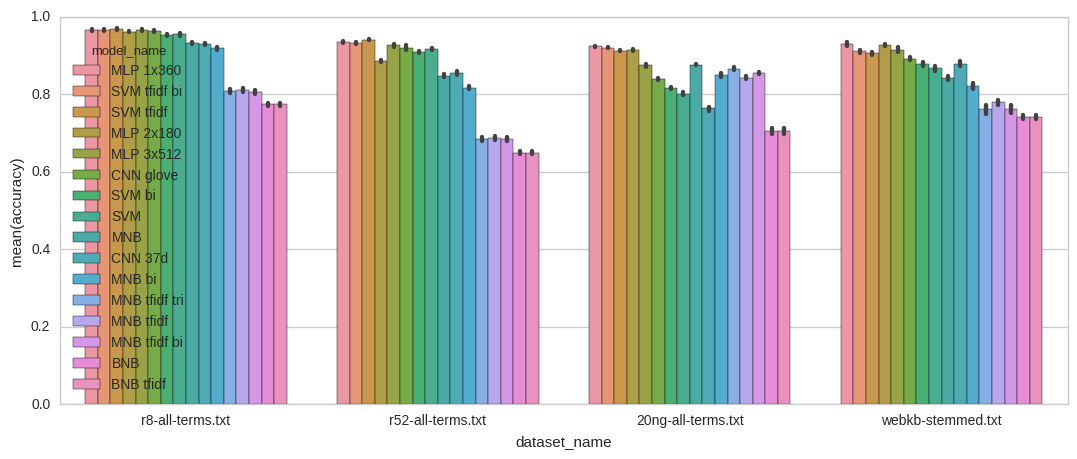

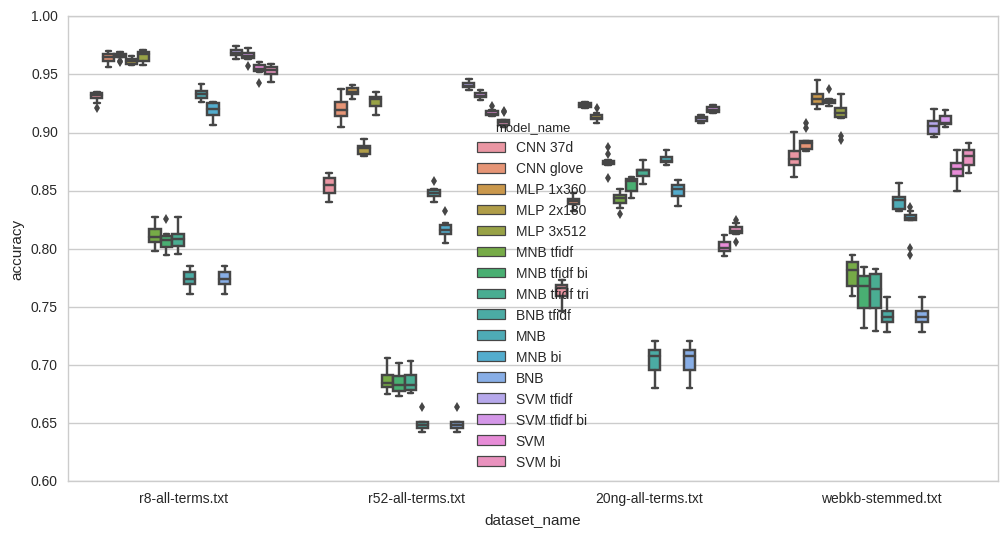

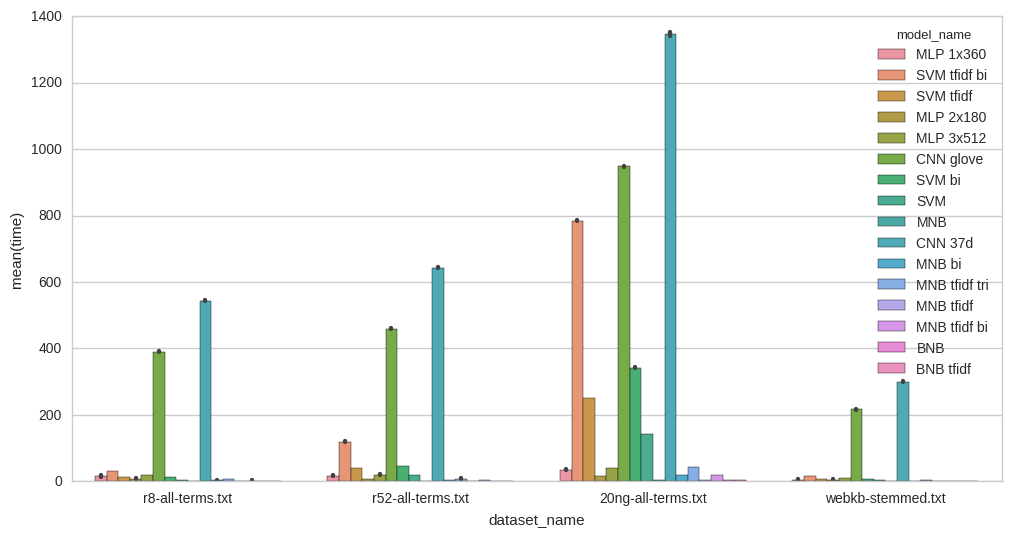

model            r8-all-terms.txt    r52-all-terms.txt    20ng-all-terms.txt    webkb-stemmed.txt
-------------  ------------------  -------------------  --------------------  -------------------
MLP 1x360                   0.966                0.935                 0.924                0.930
SVM tfidf bi                0.966                0.932                 0.920                0.911
SVM tfidf                   0.969                0.941                 0.912                0.906
MLP 2x180                   0.961                0.886                 0.914                0.927
MLP 3x512                   0.966                0.927                 0.875                0.915
CNN glove                   0.964                0.920                 0.840                0.892
SVM bi                      0.953                0.910                 0.816                0.879
SVM                         0.955                0.917                 0.802                0.868
MNB                 

In [31]:
df1_all_models = filter_df(df, datasets=basic_datasets)
make_pretty(df1_all_moels)